In [51]:
##Import four datsets 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dImport = pd.read_excel("ImportsPerCountry.xlsx", sheet_name='REPORT')
dExport = pd.read_excel("ExportsPerCountry.xlsx", sheet_name='REPORT')
dCensus = pd.read_csv("World Census.csv")
dGDP=pd.read_excel("GDP.xlsx", sheet_name= 'All Countries and Economies GDP')

# Access all column names (headings)
column_headings1 = dImport.columns.tolist()
column_headings2 = dExport.columns.tolist()
column_headings3 = dCensus.columns.tolist()
column_headings4 = dGDP.columns.tolist()

# The DataFrame 'df' now contains all data including column headings
print("Column Headings:", column_headings1)
print("Column Headings:", column_headings2) 
print("Column Headings:", column_headings3)
print("Column Headings:", column_headings4)
print("Data Preview:")

print(dImport.head())
print(dExport.head())
print(dCensus.head())
print(dGDP.head())

Column Headings: ['Country', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
Column Headings: ['Country', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
Column Headings: ['Country', 'GENC', 'Year', 'Total Population', 'Growth Rate', 'Population Density (per sq km)', 'Total Fertility Rate', 'Life Expectancy at Birth', 'Under-5 Mortality Rate', 'Sex Ratio of the Population', 'Youth and Old Age (0-14 and 65+)', 'Youth (0-14)', 'Old Age (65+)', 'Both Sexes', 'Male', 'Female']
Column Headings: ['Country', 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,

In [8]:
import pandas as pd

# Load the two files into DataFrames
file1 = pd.read_excel("ExportsPerCountry.xlsx", sheet_name='REPORT')  # First file with a 'Country' column
file2 = pd.read_excel("ImportsPerCountry.xlsx", sheet_name='REPORT')  # Second file with a 'Country' column
file3 = pd.read_csv("World Census.csv")
file4=pd.read_excel("GDP.xlsx", sheet_name='All Countries and Economies GDP')

# Extract the country lists as sets
countries1 = set(pd.read_excel("ExportsPerCountry.xlsx")['Country'])
countries2 = set(pd.read_excel("ImportsPerCountry.xlsx")['Country'])
countries3 = set(pd.read_csv("World Census.csv")['Name'])
countries4 = set(pd.read_excel("GDP.xlsx")['Country'])

# Find missing countries in each file
missing_in_df1 = (countries2 | countries3) - countries1
missing_in_df2 = (countries1 | countries3) - countries2
missing_in_df3 = (countries1 | countries2) - countries3
missing_in_df4 = (countries3 | countries4) - countries2

print("Countries missing in Dataset 1:", missing_in_df1)
print("Countries missing in Dataset 2:", missing_in_df2)
print("Countries missing in Dataset 3:", missing_in_df3)
print("Countries missing in Dataset 4:", missing_in_df4)

if countries1 == countries2 == countries3:
    print("All datasets have the same country names.")
else:
    print("Datasets differ in country names.")

Countries missing in Dataset 1: set()
Countries missing in Dataset 2: set()
Countries missing in Dataset 3: set()
Countries missing in Dataset 4: set()
All datasets have the same country names.


In [52]:
## Calculate annulalized CAGR and add a new column with CAGR score 

gdp_data = pd.read_excel("GDP.xlsx", sheet_name='All Countries and Economies GDP')

gdp_data.rename(columns={2004: '2004', 2023: '2023'}, inplace=True)

# Drop rows with missing or invalid data
gdp_data = gdp_data.dropna(subset=['2004','2023'])
gdp_data = gdp_data[gdp_data['2004'] > 0]

# Calculate the CAGR for each country
gdp_data['CAGR_2004_to_2023'] = ((gdp_data['2023'] / gdp_data['2004']) **(1 / (2023 - 2004)) - 1) * 100

# Display the results
print(gdp_data)

          Country          1992          1993          1994          1995  \
0     Afghanistan           NaN           NaN           NaN           NaN   
1         Albania  6.521750e+08  1.185315e+09  1.880951e+09  2.392765e+09   
2         Andorra  1.209992e+09  1.007090e+09  1.017544e+09  1.178745e+09   
3       Argentina  2.287790e+11  2.367420e+11  2.574400e+11  2.580320e+11   
4         Armenia  1.272835e+09  1.201313e+09  1.315159e+09  1.468317e+09   
..            ...           ...           ...           ...           ...   
149       Uruguay  6.520330e+12  6.858560e+12  7.287240e+12  7.639750e+12   
150    Uzbekistan  2.779556e+08  2.863074e+08  2.894370e+08  3.160074e+08   
151       Vanuatu  2.553420e+13  2.595850e+13  2.794190e+13  3.114970e+13   
152  South Africa  3.182811e+09  3.273508e+09  3.656808e+09  3.806983e+09   
153        Zambia  6.751472e+09  6.563813e+09  6.890675e+09  7.111271e+09   

             1996          1997          1998          1999          2000  

In [14]:
##Add a Growth Column to the datset based on CAGR values. The categories are Very low Growth, low Growth, Medium Growth and High Growth 

conditions = [
   gdp_data['CAGR_2004_to_2023'] <= 1,
    (gdp_data['CAGR_2004_to_2023'] > 1) & (gdp_data['CAGR_2004_to_2023'] <= 3),
    (gdp_data['CAGR_2004_to_2023'] > 3) & (gdp_data['CAGR_2004_to_2023'] <= 5),
    gdp_data['CAGR_2004_to_2023'] > 5
]
labels = ['Very Low Growth', 'Low Growth', 'Moderate Growth', 'High Growth']

# Add the new column
gdp_data['Growth_Category'] = np.select(conditions, labels)

print(gdp_data)

          Country          1992          1993          1994          1995  \
0     Afghanistan           NaN           NaN           NaN           NaN   
1         Albania  6.521750e+08  1.185315e+09  1.880951e+09  2.392765e+09   
2         Andorra  1.209992e+09  1.007090e+09  1.017544e+09  1.178745e+09   
3       Argentina  2.287790e+11  2.367420e+11  2.574400e+11  2.580320e+11   
4         Armenia  1.272835e+09  1.201313e+09  1.315159e+09  1.468317e+09   
..            ...           ...           ...           ...           ...   
149       Uruguay  6.520330e+12  6.858560e+12  7.287240e+12  7.639750e+12   
150    Uzbekistan  2.779556e+08  2.863074e+08  2.894370e+08  3.160074e+08   
151       Vanuatu  2.553420e+13  2.595850e+13  2.794190e+13  3.114970e+13   
152  South Africa  3.182811e+09  3.273508e+09  3.656808e+09  3.806983e+09   
153        Zambia  6.751472e+09  6.563813e+09  6.890675e+09  7.111271e+09   

             1996          1997          1998          1999          2000  

In [20]:
#Continue with Data Prepartion to build a Classification Model where we will train a model based on the numerical data and the associated labels (Growth_Category).

# Select only columns for years 1992 to 2023
year_columns = [str(year) for year in range(1992, 2024)]  # Generate year column names as strings

# Checking if all columns exist in the dataset
year_columns = [year for year in year_columns if year in gdp_data.columns]
print("Included Year Columns:", year_columns)

# Extract the x DataFrame for model training
x = gdp_data[year_columns]
print("x DataFrame:")
print("Shape of x: ", x.shape)

# Extract region column from df2 
y= gdp_data[['Growth_Category']]
print("Shape of y: ", y.shape)

Included Year Columns: ['2004', '2023']
x DataFrame:
Shape of x:  (146, 2)
Shape of y:  (146, 1)


In [37]:
#Model Fitting

from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

scaler_train = StandardScaler().fit(x_train)

x_train_array = scaler_train.transform(x_train)
x_train_scale = pd.DataFrame(x_train_array, columns = x_train.columns, index = x_train.index)

x_test_array = scaler_train.transform(x_test) ## Transform to fit to training
x_test_scale = pd.DataFrame(x_test_array, columns = x_test.columns, index = x_test.index)

print("Shape of x_train_scale: ", x_train.shape)
print("Shape of x_test_scale: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

print("Mean of 2 key_var of Train:\n" , x_train_array.mean())
print("Standard Deviation of 2 key_vars of Train:\n", x_train_scale.std())

print("Mean of 2 key_var of Test:\n" , x_test_array.mean())
print("Standard Deviation of 2 key_vars of Test:\n", x_test_scale.std())

print("X Train:", x_train)
print("X Test:", x_test)

Shape of x_train_scale:  (109, 2)
Shape of x_test_scale:  (37, 2)
Shape of y_train:  (109, 1)
Shape of y_test:  (37, 1)
Mean of 2 key_var of Train:
 -8.148425868808489e-18
Standard Deviation of 2 key_vars of Train:
 2004    1.004619
2023    1.004619
dtype: float64
Mean of 2 key_var of Test:
 0.5043002053927278
Standard Deviation of 2 key_vars of Test:
 2004    2.379544
2023    2.475462
dtype: float64
X Train:              2004          2023
10   1.400850e+09  3.066850e+09
139  6.838351e+09  6.062886e+10
115  2.562690e+11  8.092010e+11
65   1.877550e+11  4.046260e+11
118  4.603100e+09  1.742080e+10
..            ...           ...
9    2.314157e+10  7.185738e+10
111  6.676870e+10  2.676030e+11
73   1.609534e+10  1.080390e+11
125  4.680053e+08  1.633319e+09
49   8.881418e+09  7.637040e+10

[109 rows x 2 columns]
X Test:              2004          2023
7    8.680406e+09  7.235618e+10
25   9.249400e+08  2.533819e+09
29   1.201480e+11  3.432080e+11
127  1.372481e+10  3.401562e+10
150  5.4990

In [43]:
##Assess the Performance of the model based on the test data 
clf1 = svm.SVC()
y_train_s = np.squeeze(y_train) #change this dataframe into a 1-D array
y_test_s = np.squeeze(y_test)
clf1.fit(x_train_scale,y_train_s)
predictions1 = clf1.predict(x_test_scale)
score1 = accuracy_score(y_test_s,predictions1)
print(score1)

0.5675675675675675


In [47]:
#Model Evaluation and Selection (1): We will evaluate with Support Vector Machine algorithm and determine the accuracy score
clf1 = svm.SVC()
y_train_s = np.squeeze(y_train) #change this dataframe into a 1-D array
y_test_s = np.squeeze(y_test)
clf1.fit(x_train_scale,y_train_s)
predictions1 = clf1.predict(x_test_scale)
score1 = accuracy_score(y_test_s,predictions1)
print(score1)

0.5675675675675675


In [42]:
##The accuracy score indicates that almost half of the test data is predicted incorrectly. Let's print out Countries that have the CAGR Growth Score predicted incorrectly 

ytest_comp = pd.DataFrame(y_test)
ytest_comp['predicted'] = predictions1

for index,row in ytest_comp.iterrows():
    if (row['Growth_Category'] != row['predicted']):
        print(f"{index} : {row['Growth_Category']} -> {row['predicted']}")

127 : Moderate Growth -> High Growth
150 : Moderate Growth -> High Growth
45 : Moderate Growth -> High Growth
27 : Low Growth -> High Growth
42 : Moderate Growth -> High Growth
68 : Low Growth -> High Growth
17 : Moderate Growth -> High Growth
96 : Moderate Growth -> High Growth
151 : Moderate Growth -> High Growth
89 : Moderate Growth -> High Growth
113 : Low Growth -> High Growth
82 : Moderate Growth -> High Growth
47 : Low Growth -> High Growth
46 : Moderate Growth -> High Growth
2 : Low Growth -> High Growth
69 : Moderate Growth -> High Growth


In [45]:
#Model Evaluation and Selection (1): Next, let's evaluate the model with Decision Tree algorithm and determine the accuracy score

clf2=tree.DecisionTreeClassifier(random_state=0)
clf2=clf2.fit(x_train_scale, y_train)
predictions2=clf2.predict(x_test_scale)
score2=accuracy_score(y_test, predictions2)
print(score2)

0.6486486486486487


In [48]:
#We ran two classifiers — clf1 (SVM) and clf2 (Decision Tree) — on a particular random train_test_split of the full dataset. We can't really reach any conclusions about the relative performance of the two methods just by considering one split. Given that train_test_split can produce different random splits, let's write a little code to compare the two classifiers for different splits.
#We will execute the code for 20 different random splits 
for i in range (20): 
    
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    scaler_train = StandardScaler().fit(x_train)

    x_train_array = scaler_train.transform(x_train)
    x_train_scale = pd.DataFrame(x_train_array, columns = x_train.columns, index = x_train.index)

    x_test_array = scaler_train.transform(x_test) ## Transform to fit to training
    x_test_scale = pd.DataFrame(x_test_array, columns = x_test.columns, index = x_test.index)

    clf1 = svm.SVC()
    y_train_s = np.squeeze(y_train) #change this dataframe into a 1-D array
    y_test_s = np.squeeze(y_test)
    clf1.fit(x_train_scale,y_train_s)
    predictions1 = clf1.predict(x_test_scale)
    score1 = accuracy_score(y_test_s,predictions1)
    clf2=tree.DecisionTreeClassifier()
    clf2=clf2.fit(x_train_scale, y_train)
    predictions2=clf2.predict(x_test_scale)
    score2=accuracy_score(y_test, predictions2)
    print(score1, score2, score1-score2)

0.5135135135135135 0.5945945945945946 -0.08108108108108114
0.7027027027027027 0.6216216216216216 0.08108108108108114
0.6216216216216216 0.6486486486486487 -0.027027027027027084
0.7297297297297297 0.918918918918919 -0.18918918918918926
0.6486486486486487 0.7567567567567568 -0.10810810810810811
0.6216216216216216 0.6486486486486487 -0.027027027027027084
0.7837837837837838 0.8378378378378378 -0.05405405405405406
0.6486486486486487 0.7027027027027027 -0.05405405405405406
0.6486486486486487 0.7837837837837838 -0.1351351351351351
0.6216216216216216 0.7027027027027027 -0.08108108108108114
0.5405405405405406 0.7567567567567568 -0.21621621621621623
0.6486486486486487 0.6216216216216216 0.027027027027027084
0.7837837837837838 0.7837837837837838 0.0
0.5945945945945946 0.7567567567567568 -0.16216216216216217
0.5675675675675675 0.7297297297297297 -0.16216216216216217
0.5675675675675675 0.5675675675675675 0.0
0.7027027027027027 0.6756756756756757 0.027027027027027084
0.6216216216216216 0.67567567567

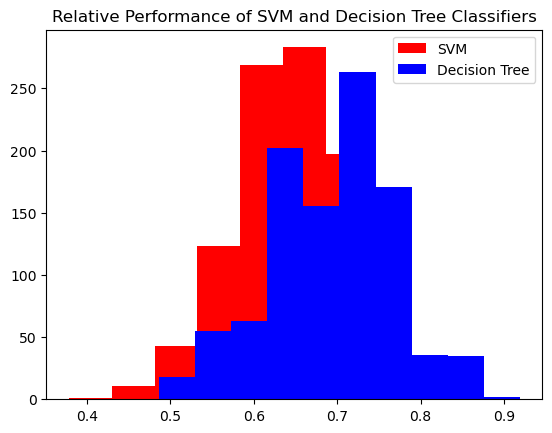

In [50]:
##Generate a visual summary of the relative performance of the two classifiers, for a larger number of runs: 

all_scores1=[]
all_scores2=[]
for i in range (1000): 
    
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    scaler_train = StandardScaler().fit(x_train)

    x_train_array = scaler_train.transform(x_train)
    x_train_scale = pd.DataFrame(x_train_array, columns = x_train.columns, index = x_train.index)

    x_test_array = scaler_train.transform(x_test) ## Transform to fit to training
    x_test_scale = pd.DataFrame(x_test_array, columns = x_test.columns, index = x_test.index)

    clf1 = svm.SVC()
    y_train_s = np.squeeze(y_train) #change this dataframe into a 1-D array
    y_test_s = np.squeeze(y_test)
    clf1.fit(x_train_scale,y_train_s)
    predictions1 = clf1.predict(x_test_scale)
    score1 = accuracy_score(y_test_s,predictions1)
    clf2=tree.DecisionTreeClassifier()
    clf2=clf2.fit(x_train_scale, y_train)
    predictions2=clf2.predict(x_test_scale)
    score2=accuracy_score(y_test, predictions2)
    all_scores1.append(score1)
    all_scores2.append(score2)
    
plt.hist(all_scores1, bins=10, color='Red', label='SVM')
plt.hist(all_scores2, bins=10, color='Blue', label='Decision Tree')
plt.legend()
plt.title('Relative Performance of SVM and Decision Tree Classifiers')
plt.show()   